<a href="https://colab.research.google.com/github/corralem/MITFutureMakers/blob/main/OpenCVEmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

In [2]:
num_classes=6
img_rows,img_cols=48,48
batch_size=32

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip /content/gdrive/My\ Drive/fer2013-20210802T043625Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/Neutral/4003.jpg  
  inflating: fer2013/train/Neutral/4759.jpg  
  inflating: fer2013/train/Neutral/1621.jpg  
  inflating: fer2013/train/Neutral/2260.jpg  
  inflating: fer2013/train/Neutral/3618.jpg  
  inflating: fer2013/train/Neutral/3750.jpg  
  inflating: fer2013/train/Neutral/362.jpg  
  inflating: fer2013/train/Neutral/1147.jpg  
  inflating: fer2013/train/Neutral/1769.jpg  
  inflating: fer2013/train/Neutral/3036.jpg  
  inflating: fer2013/train/Neutral/4163.jpg  
  inflating: fer2013/train/Neutral/2328.jpg  
  inflating: fer2013/train/Neutral/4017.jpg  
  inflating: fer2013/train/Neutral/376.jpg  
  inflating: fer2013/train/Neutral/1635.jpg  
  inflating: fer2013/train/Neutral/1806.jpg  
  inflating: fer2013/train/Neutral/3744.jpg  
  inflating: fer2013/train/Neutral/3963.jpg  
  inflating: fer2013/train/Neutral/4177.jpg  
  inflating: fer2013/train/Neutral/2248.jpg  
  inflating: fer2013/train/Sad/

In [5]:
train_data_dir='/content/fer2013/train'
validation_data_dir='/content/fer2013/validation'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:

train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 color_mode='grayscale',
 target_size=(img_rows,img_cols),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
 validation_data_dir,
 color_mode='grayscale',
 target_size=(img_rows,img_cols),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)

Found 28353 images belonging to 6 classes.
Found 3534 images belonging to 6 classes.


In [8]:
model = Sequential()

In [9]:
#Block-1
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-2
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-3
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-4
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-5
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#Block-6
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#Block-7
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

In [11]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [12]:

checkpoint = ModelCheckpoint('EmotionDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)
callbacks = [earlystop,checkpoint,reduce_lr]

In [17]:

model.compile(loss='categorical_crossentropy',
 optimizer = Adam(lr=0.001),
 metrics=['accuracy'])
nb_train_samples = 24176
nb_validation_samples = 3006
epochs=100
history=model.fit_generator(
 train_generator,
 steps_per_epoch=nb_train_samples//batch_size,
 epochs=epochs,
 callbacks=callbacks,
 validation_data=validation_generator,
 validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
755/755 [==============================] - 27s 32ms/step - loss: 1.7108 - accuracy: 0.2779 - val_loss: 1.6780 - val_accuracy: 0.3246

Epoch 00001: val_loss did not improve from 1.65125
Epoch 2/100
755/755 [==============================] - 22s 29ms/step - loss: 1.6249 - accuracy: 0.3208 - val_loss: 1.6592 - val_accuracy: 0.3814

Epoch 00002: val_loss did not improve from 1.65125
Epoch 3/100
755/755 [==============================] - 21s 28ms/step - loss: 1.5547 - accuracy: 0.3653 - val_loss: 1.5370 - val_accuracy: 0.4304

Epoch 00003: val_loss improved from 1.65125 to 1.53702, saving model to EmotionDetectionModel.h5
Epoch 4/100
755/755 [==============================] - 22s 29ms/step - loss: 1.4865 - accuracy: 0.4071 - val_loss: 1.4989 - val_accuracy: 0.4183

Epoch 00004: val_loss improved from 1.53702 to 1.49889, saving model to EmotionDetectionModel.h5
Epoch 5/100
755/755 [==============================] - 21s 28ms/step - loss: 1.4429 - accuracy: 0.4228 - val_loss: 1.443

In [14]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


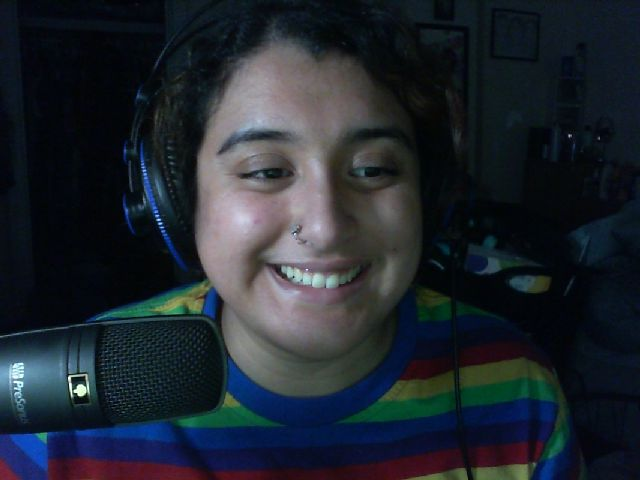

In [15]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

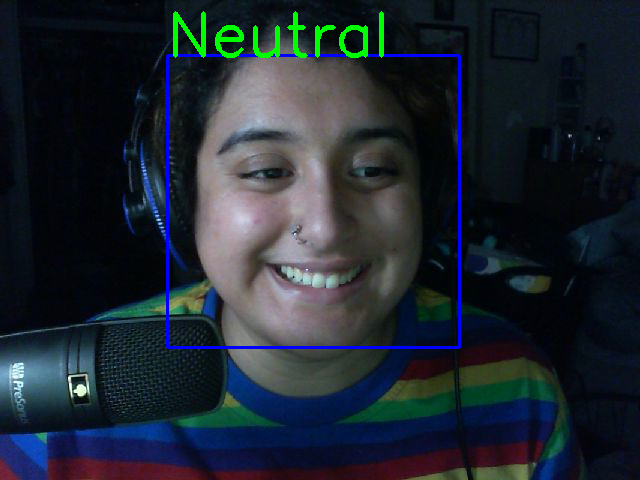

error: ignored

In [16]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_classifier=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
classifier = load_model('/content/EmotionDetectionModel.h5')

class_labels=['Angry','Happy','Neutral','Sad','Surprise','Fear']

cap=cv2.VideoCapture('/content/photo.jpg')

while True:
    ret,frame=cap.read()
    labels=[]
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi=roi_gray.astype('float')/255.0
            roi=img_to_array(roi)
            roi=np.expand_dims(roi,axis=0)

            preds=classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position=(x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(frame,'No Face Found',(20,20),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    
    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()